In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
data = pd.read_csv('part1_data.csv', header=0)
data = data.set_index('Country')

In [4]:
data

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Country,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4


Single link dendrogram

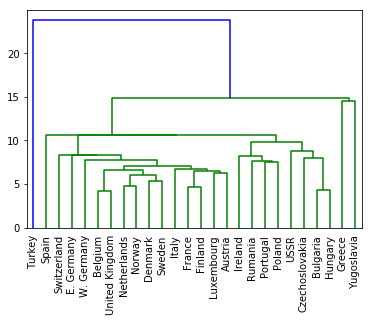

In [5]:
#single link dendrogram
dn1 = dendrogram( linkage(data, 'single'), labels=np.array(data.index), leaf_rotation=90)
plt.show()

Complete link dendrogram

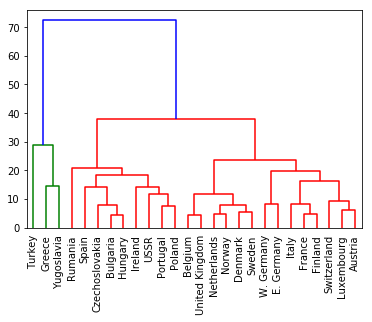

In [6]:
#complete link dendrogram
dn1 = dendrogram( linkage(data, 'complete'), labels=np.array(data.index), leaf_rotation=90)
plt.show()

Average link dendrogram

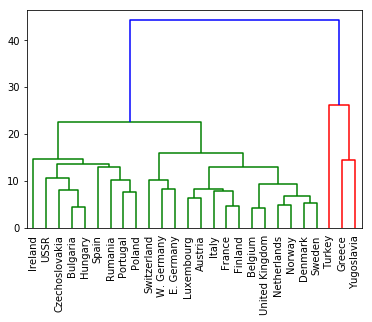

In [7]:
#complete link dendrogram
dn1 = dendrogram( linkage(data, 'average'), labels=np.array(data.index), leaf_rotation=90)
plt.show()

Now about the structures, I apologize for not being really into geography and politics, so I cannnot imply what hidden message each graph stands for. But I am pretty sure, the graphs produced by complete link dendrogram and average link dedrogram are quite similar, with most of the same countries being in the same clusters. It is probably because the single link method can be really misleading sometimes, as they only consider the clusters' closet neighbor. Complete link and average link, however, seems to focus more on the overall distrubtion of the data, probably the reason why it is more accurate.

Now test which part parameter for kmeans suit best

[9299.5900000000001,
 4254.5342857142859,
 2362.6024603174601,
 1792.9014880952377,
 1366.4098214285716,
 1149.1954166666669,
 953.61600000000021,
 778.90700000000015,
 697.99566666666692,
 582.4186666666667,
 499.53650000000016,
 402.23000000000002,
 363.00066666666669,
 292.86400000000003]

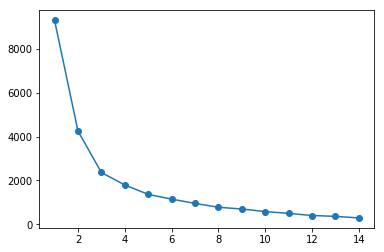

In [8]:
inertias = []
for n in np.arange(1, 15):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(np.arange(1, 15), inertias, marker="o")
inertias

Notice after 3 or 4, the slope start decreasing really slow. I will pick 4 as our appropriate cluster size due to eblow rule.

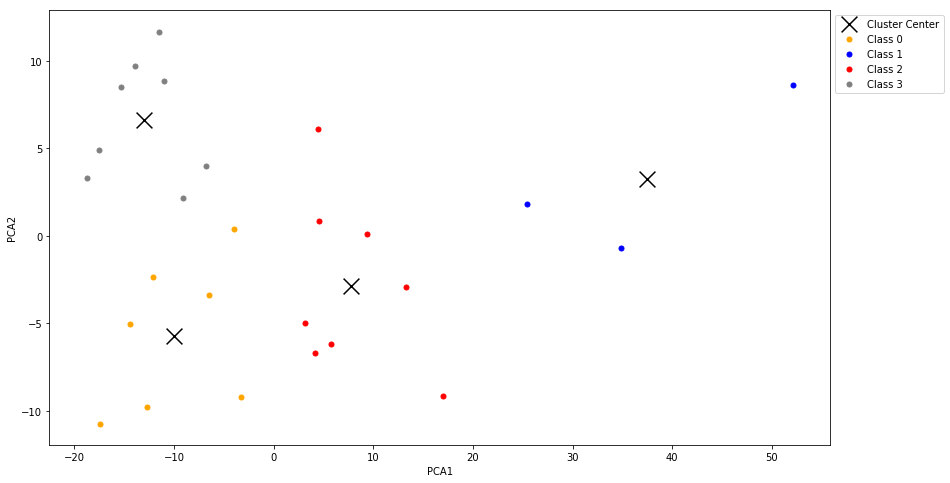

In [9]:
k_means = KMeans(n_clusters=4)
k_means.fit(data)
y_pred = k_means.predict(data)
y_pred = y_pred.reshape(len(y_pred), 1)
cc = k_means.cluster_centers_
pca = PCA(n_components=2)
x_transformed = pca.fit_transform(data)
transformed_center = pca.transform(cc)

pc = pd.DataFrame(np.concatenate((x_transformed, y_pred), axis=1), columns= ['PCA1', 'PCA2', 'target'])
dd = pd.DataFrame(np.concatenate((np.array(data.index).reshape((26, 1)), y_pred), axis=1), columns=['country', 'label'])
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(transformed_center[:, 0], transformed_center[:, 1], s=250, c='k', marker='x', label='Cluster Center')

for idx in range(4):
    tmp_pdf = pc[pc['target'] == idx]
    ax.scatter(tmp_pdf['PCA1'], tmp_pdf['PCA2'], color=['orange','blue', 'red', 'grey'][idx], label=['Class 0', 'Class 1', 'Class 2', 'Class 3'][idx], alpha=1, s=25)

ax.set(xlabel='PCA1', ylabel='PCA2')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2)
plt.show()

With no other good way to really plot our clusters, I choose to extract 2 PCA from each country and make them into a graph.